#Data Collection

Collaborating drive with google colab

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Unzipping the Dataset

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Digital Naturalist Dataset.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/Digital Naturalist Dataset.zip
   creating: Digital Naturalist Dataset/
   creating: Digital Naturalist Dataset/Bird/
   creating: Digital Naturalist Dataset/Bird/Great Indian Bustard Bird/
  inflating: Digital Naturalist Dataset/Bird/Great Indian Bustard Bird/download (1).jpg  
  inflating: Digital Naturalist Dataset/Bird/Great Indian Bustard Bird/download (10).jpg  
  inflating: Digital Naturalist Dataset/Bird/Great Indian Bustard Bird/download (11).jpg  
  inflating: Digital Naturalist Dataset/Bird/Great Indian Bustard Bird/download (2).jpg  
  inflating: Digital Naturalist Dataset/Bird/Great Indian Bustard Bird/download (3).jpg  
  inflating: Digital Naturalist Dataset/Bird/Great Indian Bustard Bird/download (4).jpg  
  inflating: Digital Naturalist Dataset/Bird/Great Indian Bustard Bird/download (5).jpg  
  inflating: Digital Naturalist Dataset/Bird/Great Indian Bustard Bird/download (6).jpg  
  inflating: Digital Naturalist Dataset

Downloading the Data

Data Augmentation Structure Creation

Augmenting the data

In [ ]:
#import libraries
from keras.preprocessing.image import ImageDataGenerator
import cv2
from os import listdir
import time

In [ ]:
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s,1)}"

In [ ]:
def augment_data(file_dir, n_generated_samples, save_to_dir):
    
    data_gen = ImageDataGenerator(rotation_range=30, 
                                  width_shift_range=0.1,
                                  height_shift_range=0.15, 
                                  shear_range=0.25, 
                                  zoom_range = 0.2,
                                  horizontal_flip=True, 
                                  vertical_flip=False, 
                                  fill_mode='nearest',
                                  brightness_range=(0.5,1.2)
                                 )
    for filename in listdir(file_dir):
        # load the image
        image = cv2.imread(file_dir + '/' + filename)
        
        # reshape the image
        image = image.reshape((1,)+image.shape)
       
        # prefix of the names for the generated sampels.
        save_prefix = 'aug_' + filename[:-4]
        # generate 'n_generated_samples' sample images
        i=0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, save_prefix=save_prefix, save_format='jpg'):
            i += 1
            if i > n_generated_samples:
                break
    """
    Arguments: file_dir: A string representing the directory where images that we want to augment are found. 
          n_generated_samples: A string representing the number of generated samples using the given image. 
          save_to_dir: A string representing the directory in which the generated images will be saved."""

Saving images back to given path

In [ ]:
file_dir=r"/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset"

Calling function for each subfolders & giving input params

In [ ]:
start_time = time.time()

#3. Augmentation Structure Creation
augmented_data_path = r"/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/augmented data"

#For Birds
# augment data for the examples with label equal to GIB in Birds
augment_data(file_dir=r'/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Bird/Great Indian Bustard Bird', n_generated_samples=8, save_to_dir=augmented_data_path+'/Bird/GIB_AUG')
# augment data for the examples with label equal to GIB in Birds
augment_data(file_dir=r'/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Bird/Spoon Billed Sandpiper Bird', n_generated_samples=8, save_to_dir=augmented_data_path+'/Bird/SPS_AUG')

#For MAMMALS
# augment data for the examples with label equal to GIB in Flower
augment_data(file_dir=r'/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Flower/Corpse Flower', n_generated_samples=8, save_to_dir=augmented_data_path+'/Flower/Corpse_AUG')
# augment data for the examples with label equal to GIB in Flower
augment_data(file_dir=r'/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Flower/Lady Slipper Orchid Flower', n_generated_samples=8, save_to_dir=augmented_data_path+'/Flower/LS_Orchid_AUG')

#For Flowers
# augment data for the examples with label equal to GIB in Mammals
augment_data(file_dir=r'/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Mammal/Pangolin Mammal', n_generated_samples=8, save_to_dir=augmented_data_path+'/Mammal/LS_Pangolin_AUG')
# augment data for the examples with label equal to GIB in Mammals
augment_data(file_dir=r'/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Mammal/Senenca White Deer Mammal', n_generated_samples=8, save_to_dir=augmented_data_path+'/Mammal/SW_Deer_AUG')


end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Elapsed time: 0:0:34.6


# Loading Data and Preprocessing

Importing the libraries

In [ ]:
#For matrix calculations and data Managememnt
import pandas as pd
import numpy as np

#Importing libraries required for the model
import tensorflow as tf
import keras 
import keras.backend as K

from keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras.applications import *
from keras.preprocessing import *
from keras_preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, BatchNormalization,Dropout
from keras.models import Model
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

#For plotting charts used for data visualizations
import matplotlib.pyplot as plt

#Libraries for Locating and loading data
import pathlib
from pathlib import Path
import os, gc, glob, random
from PIL import Image

Make a list of paths to all folders where you have data

In [ ]:
#Setting path to our dataset folder
#dirName = r'C:/Users/vijay/OneDrive/Desktop/Digital Naturalist'
dirName="/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset"

folders = listdir(dirName)

#Getting the names for all the folders containing data        
def getListOfFiles(dirName):
# create a list of sub directories and files(if any)
# names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for fol_name in listOfFile:
        fullPath = os.path.join(dirName, fol_name)
        allFiles.append(fullPath)
              
    return allFiles

Folders = getListOfFiles(dirName)
len(Folders)
subfolders = []
for num in range(len(Folders)):
    sub_fols = getListOfFiles(Folders[num])
    subfolders+=sub_fols
#Now, the subfolders contains the address to all our data folders for each class
subfolders

['/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Bird/Great Indian Bustard Bird',
 '/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Bird/Spoon Billed Sandpiper Bird',
 '/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Flower/Corpse Flower',
 '/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Flower/Lady Slipper Orchid Flower',
 '/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Mammal/Pangolin Mammal',
 '/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Mammal/Senenca White Deer Mammal']

Loading Images into machine understandable Data

In [ ]:
#X data will includes the data generated for each image
#Y data will include a id no:, for every different boat type in out boats folder
#a different number is being assigned. That will be tha label we're classifying.
X_data = []
Y_data = []


id_no=0
found = []
#itering in all folders under Boats folder
for paths in subfolders:
    #setting folder path for each boat type
    files = glob.glob (paths + "/*.jpg")
    found.append((paths.split('\\')[-1],paths.split('\\')[-1]))
    
    #itering all files under the folder one by one
    for myFile in files:
        img = Image.open(myFile)
        #img.thumbnail((width, height), Image.ANTIALIAS) # resizes image in-place keeps ratio
        img = img.resize((224,224), Image.ANTIALIAS) # resizes image without ratio
        #convert the images to numpy arrays
        img = np.array(img)
        if img.shape == ( 224, 224, 3):
            # Add the numpy image to matrix with all data
            X_data.append (img)
            Y_data.append (id_no)
    id_no+=1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#Define arguments for ImageDataGenerator Class
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

Applying ImageDataGenerator functionality to trainset and testset

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset"

In [ ]:
x_train=train_datagen.flow_from_directory(path,target_size = (64,64),batch_size = 32,class_mode = "categorical")
x_test=test_datagen.flow_from_directory(path,target_size = (64,64),batch_size = 32,class_mode = "categorical")

Found 138 images belonging to 3 classes.
Found 138 images belonging to 3 classes.


Data splitting into Train And Test

In [ ]:
#to see our data
print(X_data)
print(Y_data)

#converting lists to np arrays again
X = np.array(X_data)
Y = np.array(Y_data)

# Print shapes to see if they are correct
print("x-shape",X.shape,"y shape", Y.shape)

#The Keras library offers a function called to_categorical() that you can use to one hot enode
#integer data. The sequence has an example of all known values
#so we can use the to_categorical() function directly
X = X.astype('float32')/255.0
y_cat = to_categorical(Y_data, len(subfolders))

print("X shape",X,"y_cat shape", y_cat)
print("X shape",X.shape,"y_cat shape", y_cat.shape)


[array([[[139, 139, 141],
        [139, 139, 141],
        [139, 139, 141],
        ...,
        [142, 142, 144],
        [143, 143, 145],
        [142, 142, 144]],

       [[139, 139, 141],
        [139, 139, 141],
        [139, 139, 141],
        ...,
        [142, 142, 144],
        [143, 143, 145],
        [142, 142, 144]],

       [[139, 139, 141],
        [139, 139, 141],
        [139, 139, 141],
        ...,
        [142, 142, 144],
        [143, 143, 145],
        [142, 142, 144]],

       ...,

       [[144, 124,  87],
        [145, 125,  88],
        [149, 129,  92],
        ...,
        [171, 152, 111],
        [171, 152, 111],
        [171, 152, 110]],

       [[141, 121,  84],
        [144, 124,  87],
        [148, 128,  91],
        ...,
        [171, 152, 112],
        [172, 153, 113],
        [171, 152, 112]],

       [[138, 118,  81],
        [141, 121,  84],
        [145, 125,  88],
        ...,
        [171, 152, 112],
        [171, 152, 112],
        [170, 151, 111]

[]
[]
x-shape (0,) y shape (0,)
X shape [] y_cat shape []
X shape (0,) y_cat shape (0, 3)

#Splitting the data to Test and Train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2)
print("The model has " + str(len(X_train)) + " inputs")

The model has 110 inputs


#Getting Started with Convolutional Neural Networks (CNN)

Start(sequential)

**#MODEL BUILDING** 

In [ ]:
early_stop_loss = EarlyStopping(monitor='loss', patience=3, verbose=1)
early_stop_val_acc = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)
model_callbacks=[early_stop_loss, early_stop_val_acc]

Add Layers(Conv, Maxpool, Flatten, Dense, Dropout)

In [ ]:
#defining our model, All the layers and configurations
def load_CNN(output_size):
  K.clear_session()
  model = Sequential()
  model.add(Dropout(0.4,input_shape=(224, 224, 3)))
  
  model.add(Conv2D(256, (5, 5),input_shape=(224, 224, 3),activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  #model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  #model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  #model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))

  model.add(Dense(output_size, activation='softmax'))
  
  return model

Building Model(Summary, Compile, Fit, Predict)

**#Model Summary**

In [ ]:
#Building a model based on the above defined function
model = load_CNN(6) #Number of Columns / Outputs
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model.summary() #to print model summary
weights = model.get_weights() #to get the weights from our model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 256)     19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        7

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**#Fitting Model**

In [ ]:
#some arrays to store the result of each model (model trained on each bath size)
histories_acc = []
histories_val_acc = []
histories_loss = []
histories_val_loss = []


model.set_weights(weights)
h=model.fit(X_train,y_train,
              batch_size=16,
              epochs=7,
              verbose=1,
              callbacks=[early_stop_loss],
              shuffle=True,
              validation_data=(X_test, y_test))

model.summary() #to print model summary

Epoch 1/7
7/7 [==============================] - 86s 12s/step - loss: 3.0162 - accuracy: 0.1909 - val_loss: 1.8112 - val_accuracy: 0.0714
Epoch 2/7
7/7 [==============================] - 78s 11s/step - loss: 1.7801 - accuracy: 0.1818 - val_loss: 1.7979 - val_accuracy: 0.1429
Epoch 3/7
7/7 [==============================] - 80s 12s/step - loss: 1.7977 - accuracy: 0.2364 - val_loss: 1.7979 - val_accuracy: 0.1071
Epoch 4/7
7/7 [==============================] - 76s 11s/step - loss: 1.7884 - accuracy: 0.2000 - val_loss: 1.8004 - val_accuracy: 0.1786
Epoch 5/7
7/7 [==============================] - 76s 11s/step - loss: 1.8378 - accuracy: 0.1909 - val_loss: 1.8011 - val_accuracy: 0.1071
Epoch 5: early stopping
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 224, 224, 3)       0         
                                                                 
 c

In [ ]:
model.set_weights(weights)
h=model.fit(X_train,y_train,
              batch_size=16,
              epochs=15,
              verbose=1,
              callbacks=[early_stop_loss],
              shuffle=True,
              validation_data=(X_test, y_test))

Epoch 1/15
7/7 [==============================] - 91s 13s/step - loss: 1.9735 - accuracy: 0.1182 - val_loss: 1.7991 - val_accuracy: 0.1071
Epoch 2/15
7/7 [==============================] - 79s 11s/step - loss: 1.8036 - accuracy: 0.1727 - val_loss: 1.8049 - val_accuracy: 0.1786
Epoch 3/15
7/7 [==============================] - 81s 11s/step - loss: 1.8095 - accuracy: 0.1091 - val_loss: 1.7935 - val_accuracy: 0.1429
Epoch 4/15
7/7 [==============================] - 80s 12s/step - loss: 1.8223 - accuracy: 0.2545 - val_loss: 1.7937 - val_accuracy: 0.1786
Epoch 5/15
7/7 [==============================] - 79s 11s/step - loss: 1.7786 - accuracy: 0.2364 - val_loss: 1.7892 - val_accuracy: 0.1786
Epoch 6/15
7/7 [==============================] - 78s 11s/step - loss: 1.7422 - accuracy: 0.3000 - val_loss: 1.7855 - val_accuracy: 0.2143
Epoch 7/15
7/7 [==============================] - 81s 12s/step - loss: 1.7244 - accuracy: 0.3182 - val_loss: 1.7824 - val_accuracy: 0.1429
Epoch 8/15
7/7 [===========

#Evaluation And Model Saving

Evaluation(Accuracy and Losses)

**#Accuracy, Loss**

In [ ]:
#printing the keys we have for the stores values
print(h.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
histories_acc = []
histories_val_acc = []
histories_loss = []
histories_val_loss = []

In [ ]:
#appending the data for each epoch in a arr, and for each batch size
histories_acc.append(h.history['accuracy'])
histories_val_acc.append(h.history['val_accuracy'])
histories_loss.append(h.history['loss'])
histories_val_loss.append(h.history['val_loss'])

In [ ]:
#converting into numpy arrays
histories_acc = np.array(histories_acc)
histories_val_acc = np.array(histories_val_acc)
histories_loss = np.array(histories_loss)
histories_val_loss = np.array(histories_val_loss)

In [ ]:
#here we have 3 columns and 6 rows each,ever row representss differnet bath size,
#every column represent different epoch scores.
print('histories_acc',histories_acc , 
      'histories_loss', histories_loss,
      'histories_val_acc', histories_val_acc, 
      'histories_val_loss', histories_val_loss)

histories_acc [[0.11818182 0.17272727 0.10909091 0.25454545 0.23636363 0.30000001
  0.31818181 0.35454544 0.5090909  0.62727273 0.77272725 0.86363637
  0.85454547 0.92727274 0.92727274]] histories_loss [[1.9735254  1.80359578 1.80954015 1.82234871 1.77863562 1.74219704
  1.72439599 1.58716786 1.27191532 1.04142702 0.66466242 0.42945349
  0.33370885 0.36248276 0.18462285]] histories_val_acc [[0.10714286 0.17857143 0.14285715 0.17857143 0.17857143 0.21428572
  0.14285715 0.25       0.35714287 0.5        0.35714287 0.39285713
  0.25       0.35714287 0.2857143 ]] histories_val_loss [[1.79905951 1.80488646 1.79352951 1.79370368 1.7891922  1.78546524
  1.78239822 1.70560896 1.66801775 1.59464335 1.6963141  2.28205085
  2.26516509 2.74223661 3.50914335]]


**Loading a Test Image & Making a Test Prediction** 

In [ ]:
#Predicting the image's classes
#individual scores for each class as well as class with the highest score is printed

#making predictions ,storing result as array of probabilities of each class predicted
predictions = model.predict([X_test[8].reshape(1, 224,224,3)])
predictions


1/1 [==============================] - 0s 220ms/step


array([[5.3111761e-04, 8.1414972e-03, 9.7026742e-01, 5.8613434e-05,
        2.3869313e-04, 2.0762509e-02]], dtype=float32)

In [ ]:
for idx, result, x in zip(range(0,6), found, predictions[0]):
   print("Label: {}, Type : {}, Species : {} , Score : {}%".format(idx, result[0],result[1], round(x*100,3)))

Label: 0, Type : /content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Bird/Great Indian Bustard Bird, Species : /content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Bird/Great Indian Bustard Bird , Score : 0.053%
Label: 1, Type : /content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Bird/Spoon Billed Sandpiper Bird, Species : /content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Bird/Spoon Billed Sandpiper Bird , Score : 0.814%
Label: 2, Type : /content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Flower/Corpse Flower, Species : /content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Flower/Corpse Flower , Score : 97.027%
Label: 3, Type : /content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Flower/Lady Slipper Orchid Flower, Species : /content/drive/MyDrive/Colab Notebook

In [ ]:
#predicting the class with max probability
ClassIndex=np.argmax(model.predict([X_test[image_number-1].reshape(1, 224,224,3)]),axis=1)
#getting the index of the class which we can pass 
#to the boat_types list to get the boat type name
ClassIndex

1/1 [==============================] - 0s 219ms/step


array([5])

In [ ]:
print(found[ClassIndex[0]])

('/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Mammal/Senenca White Deer Mammal', '/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/Digital Naturalist Dataset/Mammal/Senenca White Deer Mammal')


In [ ]:
#loading Test Data 
image_number = random.randint(0,len(X_test))
print(image_number)

27


In [ ]:
#plotting the test image
plt.figure(figsize=(8, 8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

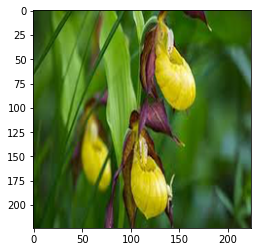

In [ ]:
plt.imshow(X_test[image_number])

In [ ]:
#loading Test Data 
image_number = random.randint(0,len(X_test))
print(image_number)

7


In [ ]:
#plotting the test image
plt.figure(figsize=(8, 8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

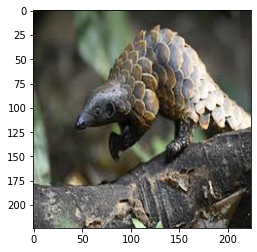

In [ ]:
plt.imshow(X_test[image_number])

Model Saving and Loading

In [ ]:
h5_path=r'/content/drive/MyDrive/Colab Notebooks/Digital Naturalist/final_model.h5'
model.save(h5_path)

In [ ]:
#saving necessary model files
model_json = model.to_json() #indent=2
with open("final_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# serialize weights to H5
model.save_weights("final_model.h5")
print("Saved model to disk")

Saved model to disk
